<a href="https://colab.research.google.com/github/Faareh-Ahmed/Anomaly-Detection/blob/main/Copy_of_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as ssn
import matplotlib.pyplot as plt
import pandas as pd
import os

# Storing the dataset

In [3]:

folder_path = '/content/sample_data/CICIoTdataset'

# Get a list of all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
data = pd.DataFrame()

# Loop through each CSV file and concatenate the data to the main DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    temp_df = pd.read_csv(file_path)
    data = pd.concat([data, temp_df], ignore_index=True)



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114165 entries, 0 to 2114164
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [5]:
print(data['label'].nunique())

36


In [6]:
print(data['label'].unique())

['DDoS-RSTFINFlood' 'DDoS-SYN_Flood' 'DDoS-PSHACK_Flood' 'Mirai-udpplain'
 'DDoS-SynonymousIP_Flood' 'DoS-SYN_Flood' 'Mirai-greip_flood'
 'DDoS-ICMP_Flood' 'DoS-UDP_Flood' 'DDoS-TCP_Flood' 'BenignTraffic'
 'DDoS-ICMP_Fragmentation' 'DoS-TCP_Flood' 'DDoS-UDP_Flood'
 'Recon-HostDiscovery' 'Mirai-greeth_flood' 'MITM-ArpSpoofing'
 'DDoS-UDP_Fragmentation' 'Recon-OSScan' 'DNS_Spoofing' 'DoS-HTTP_Flood'
 'DDoS-ACK_Fragmentation' 'Recon-PortScan' 'Backdoor_Malware'
 'VulnerabilityScan' 'DDoS-SlowLoris' 'DDoS-HTTP_Flood'
 'DictionaryBruteForce' 'SqlInjection' 'BrowserHijacking' nan
 'CommandInjection' 'Recon-PingSweep' 'XSS' 'Uploading_Attack'
 'DDoS-PSHACK_' 'DDoS-SynonymousIP']


In [7]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 135


In [8]:
# Remove rows with NaN in the 'label' column
data = data.dropna(subset=['label'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114030 entries, 0 to 2114163
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [10]:
print(data['label'].nunique())

36


In [11]:
print(data['label'].unique())

['DDoS-RSTFINFlood' 'DDoS-SYN_Flood' 'DDoS-PSHACK_Flood' 'Mirai-udpplain'
 'DDoS-SynonymousIP_Flood' 'DoS-SYN_Flood' 'Mirai-greip_flood'
 'DDoS-ICMP_Flood' 'DoS-UDP_Flood' 'DDoS-TCP_Flood' 'BenignTraffic'
 'DDoS-ICMP_Fragmentation' 'DoS-TCP_Flood' 'DDoS-UDP_Flood'
 'Recon-HostDiscovery' 'Mirai-greeth_flood' 'MITM-ArpSpoofing'
 'DDoS-UDP_Fragmentation' 'Recon-OSScan' 'DNS_Spoofing' 'DoS-HTTP_Flood'
 'DDoS-ACK_Fragmentation' 'Recon-PortScan' 'Backdoor_Malware'
 'VulnerabilityScan' 'DDoS-SlowLoris' 'DDoS-HTTP_Flood'
 'DictionaryBruteForce' 'SqlInjection' 'BrowserHijacking'
 'CommandInjection' 'Recon-PingSweep' 'XSS' 'Uploading_Attack'
 'DDoS-PSHACK_' 'DDoS-SynonymousIP']


In [12]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 0


# Classifying Anomaly as 1 and Non-Anomaly as 0

The label feature has 34/35 different values originally which are classified as different types of anomaly but the BenignTraffic  meaning that NON-Anomaly. Hence we will assign the BenignTraffic values in the dataset as 0 and Anomaly values as 1.

In [13]:
# Assuming your DataFrame is named df
binary_mapping = {'BenignTraffic': 0, 'DDoS-SYN_Flood': 1, 'DDoS-PSHACK_Flood': 1, 'DDoS-ICMP_Flood': 1,
                  'DDoS-TCP_Flood': 1, 'DDoS-SynonymousIP_Flood': 1, 'DDoS-RSTFINFlood': 1,
                  'DoS-SYN_Flood': 1, 'DDoS-UDP_Flood': 1, 'Mirai-greip_flood': 1,
                  'DDoS-UDP_Fragmentation': 1, 'DoS-UDP_Flood': 1, 'Mirai-udpplain': 1,
                  'MITM-ArpSpoofing': 1, 'DoS-TCP_Flood': 1, 'DNS_Spoofing': 1,
                  'Mirai-greeth_flood': 1, 'DDoS-ACK_Fragmentation': 1, 'DDoS-ICMP_Fragmentation': 1,
                  'Recon-OSScan': 1, 'Recon-HostDiscovery': 1, 'DoS-HTTP_Flood': 1,
                  'VulnerabilityScan': 1, 'Recon-PortScan': 1, 'DictionaryBruteForce': 1,
                  'DDoS-SlowLoris': 1, 'DDoS-HTTP_Flood': 1, 'CommandInjection': 1,
                  'SqlInjection': 1, 'BrowserHijacking': 1, 'XSS': 1, 'Backdoor_Malware': 1,
                  'Recon-PingSweep': 1, 'Uploading_Attack': 1, 'DDoS-SynonymousIP': 1, 'DD': 1, 'DDoS-': 1,
                  'DoS-UDP_Flo': 1, 'DDoS': 1 }

# Map the values in the 'label' column using the binary_mapping
data['label'] = data['label'].map(binary_mapping).fillna(1).astype(int)


In [14]:
print(data['label'].nunique())

2


In [15]:
print(data['label'].unique())

[1 0]


In [16]:
total_benign_traffic_rows = data[data['label'] == 0].shape[0]

print("Total rows with label 'BenignTaffic' :", total_benign_traffic_rows)


Total rows with label 'BenignTaffic' : 49369


# Data Analysis

# Model Training

In [17]:
from sklearn.model_selection import train_test_split
X = data.drop("label", axis=1)
Y = data["label"]


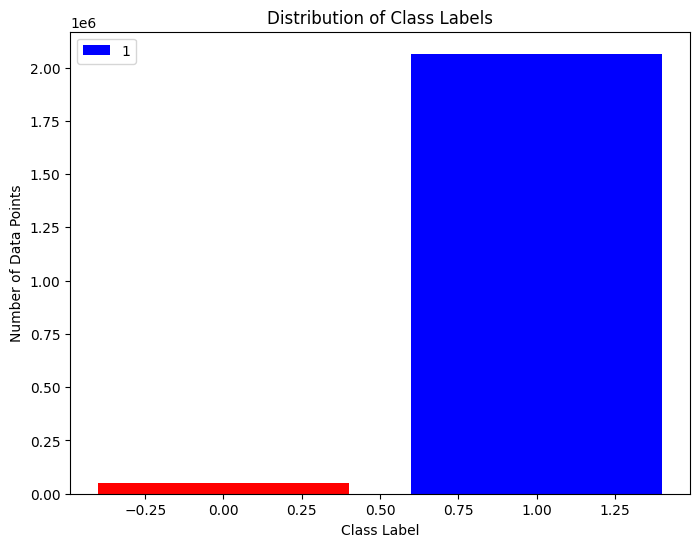

In [18]:

# Count occurrences of each class
class_counts = Y.value_counts()

# Define colors for each class
colors = ['blue', 'red']  # Adjust colors as needed

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel("Class Label")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Class Labels")

# Add a legend if needed
plt.legend(class_counts.index, loc='upper left')

plt.show()


In [19]:
# Check class imbalance
print(Y.value_counts())

1    2064661
0      49369
Name: label, dtype: int64


<Axes: ylabel='label'>

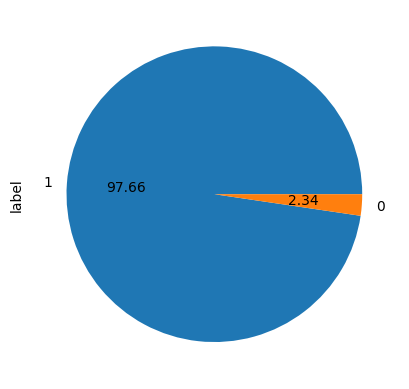

In [20]:
Y.value_counts().plot.pie(autopct="%.2f")

In [21]:
from imblearn.over_sampling import ADASYN
ros = ADASYN(sampling_strategy='auto', random_state=None, n_neighbors=5, n_jobs=None)
X_ros , Y_ros = ros.fit_resample(X,Y)


In [22]:
print(Y_ros.value_counts())

1    2064661
0    2060646
Name: label, dtype: int64


<Axes: ylabel='label'>

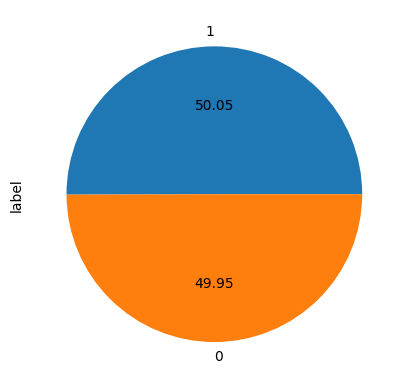

In [23]:
Y_ros.value_counts().plot.pie(autopct="%.2f")

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_ros)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_ros,Y_ros,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3300245, 46)
(825062, 46)
(3300245,)
(825062,)


In [26]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(n_jobs=-1)
logistic_regression_model.fit(X_train, Y_train)
Y_pred = logistic_regression_model.predict(X_test)


# Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred, average='macro'))

Accuracy: 0.9851380865922803
Recall: 0.9851380537231522
Precision: 0.9851453971800281
F1 Score: 0.9851380298596017


In [28]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    412524
           1       0.98      0.99      0.99    412538

    accuracy                           0.99    825062
   macro avg       0.99      0.99      0.99    825062
weighted avg       0.99      0.99      0.99    825062



# Confusion Matrix

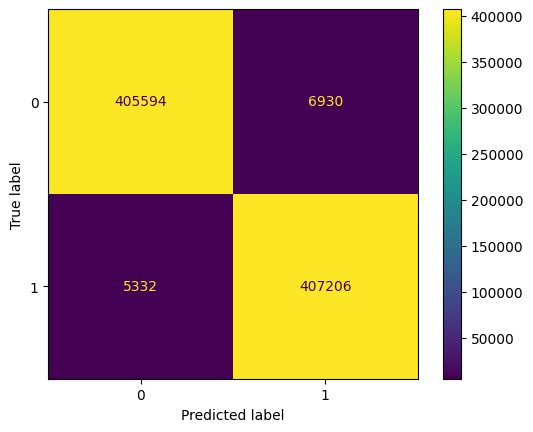

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred, labels=logistic_regression_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression_model.classes_)
disp.plot()
plt.show()


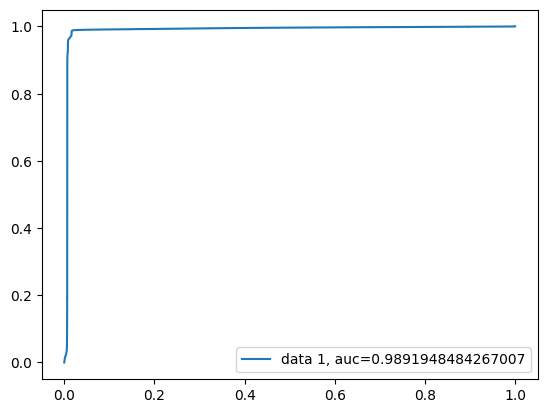

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# plotting the ROC curve and calculating AUC score
# 0(worst) to 1(best) -> 0.98 score


# Creating a Mesh Grid from 2 features

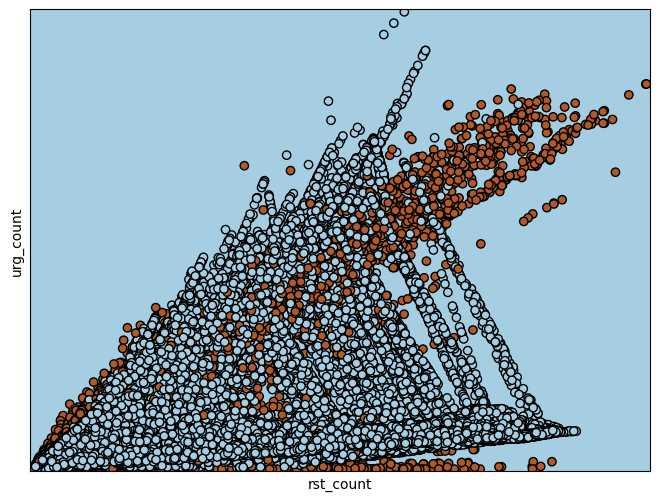

In [31]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X_ros and Y_ros are your feature matrix and target variable
X_train, X_test, Y_train, Y_test = train_test_split(X_ros, Y_ros, test_size=0.2, random_state=42)

# Create an instance of Logistic Regression Classifier and fit the data
logistic_regression_model = LogisticRegression(n_jobs=-1)
logistic_regression_model.fit(X_train[['rst_count', 'urg_count']], Y_train)

# Create a scatter plot with decision boundary
plt.figure(figsize=(8, 6))

# Plot decision boundary
DecisionBoundaryDisplay.from_estimator(
    logistic_regression_model,
    X_train[['rst_count', 'urg_count']],  # Use Telnet on the x-axis and Tot size on the y-axis
    cmap=plt.cm.Paired,
    ax=plt.gca(),
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="rst_count",
    ylabel="urg_count",
    eps=0.5,
)

# Plot training points
plt.scatter(X_train['rst_count'], X_train['urg_count'], c=Y_train, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()


# Feature Importance Graph from Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier




# Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [33]:
# Make predictions on the test set
Y_pred_rf = rf_model.predict(X_test)




In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("Recall:", recall_score(Y_test, Y_pred_rf, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred_rf, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred_rf, average='macro'))

Accuracy: 0.9983346706065725
Recall: 0.9983346954089766
Precision: 0.9983389049541831
F1 Score: 0.9983346671305677


In [35]:
from sklearn.metrics import classification_report

# Print classification report for more detailed metrics
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    412524
           1       1.00      1.00      1.00    412538

    accuracy                           1.00    825062
   macro avg       1.00      1.00      1.00    825062
weighted avg       1.00      1.00      1.00    825062



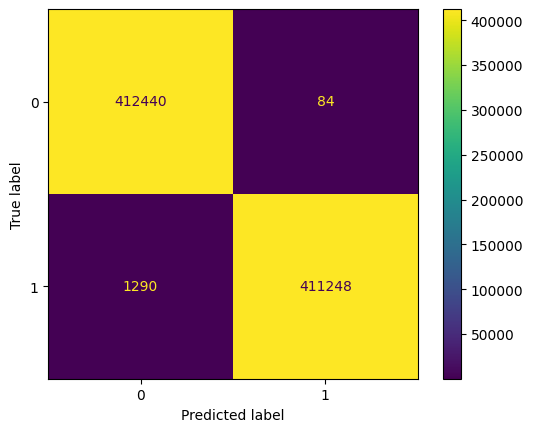

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(Y_test, Y_pred_rf, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot()
plt.show()


# Mesh Daigram for 2 features of Random Forest

In [ ]:
X_train_new = X_train[["urg_count", "rst_count"]]
X_test_new=X_test[["urg_count", "rst_count"]]

In [ ]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389772 entries, 263106 to 121958
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   urg_count  389772 non-null  float64
 1   rst_count  389772 non-null  float64
dtypes: float64(2)
memory usage: 8.9 MB


In [ ]:
Y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 389772 entries, 263106 to 121958
Series name: label
Non-Null Count   Dtype
--------------   -----
389772 non-null  int64
dtypes: int64(1)
memory usage: 5.9 MB


In [ ]:
from sklearn.ensemble import RandomForestClassifier




# Random Forest model
rf_model_new = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_model_new.fit(X_train_new, Y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions on the test set
Y_pred_rf_new = rf_model_new.predict(X_test_new)




In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf_new))
print("Recall:", recall_score(Y_test, Y_pred_rf_new, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred_rf_new, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred_rf_new, average='macro'))

Accuracy: 0.9886396289150692
Recall: 0.9886176347582417
Precision: 0.9887633502958266
F1 Score: 0.9886384299782484


In [ ]:
print(X_train_new["urg_count"].max())
print(X_train_new["urg_count"].min())
print(X_train_new["rst_count"].max())
print(X_train_new["rst_count"].min())

3101.0
0.0
9331.5
0.0


In [ ]:
# define bounds of the domain
min_urg, max_urg = X_train_new["urg_count"].min() - 1, X_train_new["urg_count"].max() + 1
min_rst, max_rst = X_train_new["rst_count"].min() - 1, X_train_new["rst_count"].max() + 1

print(f"Minimum 'urg_count': {min_urg}, Maximum 'urg_count': {max_urg}")
print(f"Minimum 'rst_count': {min_rst}, Maximum 'rst_count': {max_rst}")

Minimum 'urg_count': -1.0, Maximum 'urg_count': 3102.0
Minimum 'rst_count': -1.0, Maximum 'rst_count': 9332.5


In [ ]:
import numpy as np

# Assuming min_rst, max_rst, min_urg, max_urg are previously defined
x1grid = np.arange(min_urg, max_urg, 0.5)
x2grid = np.arange(min_rst, max_rst, 0.5)


In [ ]:
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

In [ ]:
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

In [ ]:
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1, r2))

In [ ]:
# make predictions for the grid
Y_pred_rf_new = rf_model_new.predict(grid)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



The warning you're seeing is related to the feature names of your dataset not being available, but the RandomForestClassifier was fitted with feature names during training. This warning is not an error and should not affect the predictions.

If you want to get rid of this warning, you can try providing the feature names when fitting the RandomForestClassifier. During training, you can set the feature_names parameter to the column names of your training data:

# Assuming X_train_new is a DataFrame with column names
rf_model_new.fit(X_train_new, y_train, feature_name=["urg_count", "rst_count"])

# Assuming X_train_new is a DataFrame with column names
rf_model_new.fit(X_train_new, y_train, feature_name=["urg_count", "rst_count"])
This way, the feature names will be associated with the model, and you might not see the warning during predictions. Keep in mind that this is more of a warning for informative purposes and doesn't impact the functionality of your code.

# Popular Features

In [37]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values to get the most important features
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)


Top 10 Important Features (Random Forest):
          Feature  Importance
17      urg_count    0.208597
18      rst_count    0.133433
39            IAT    0.131296
40         Number    0.099413
45         Weight    0.069143
41       Magnitue    0.050103
44       Variance    0.047747
0   flow_duration    0.036366
36            AVG    0.036049
38       Tot size    0.031420


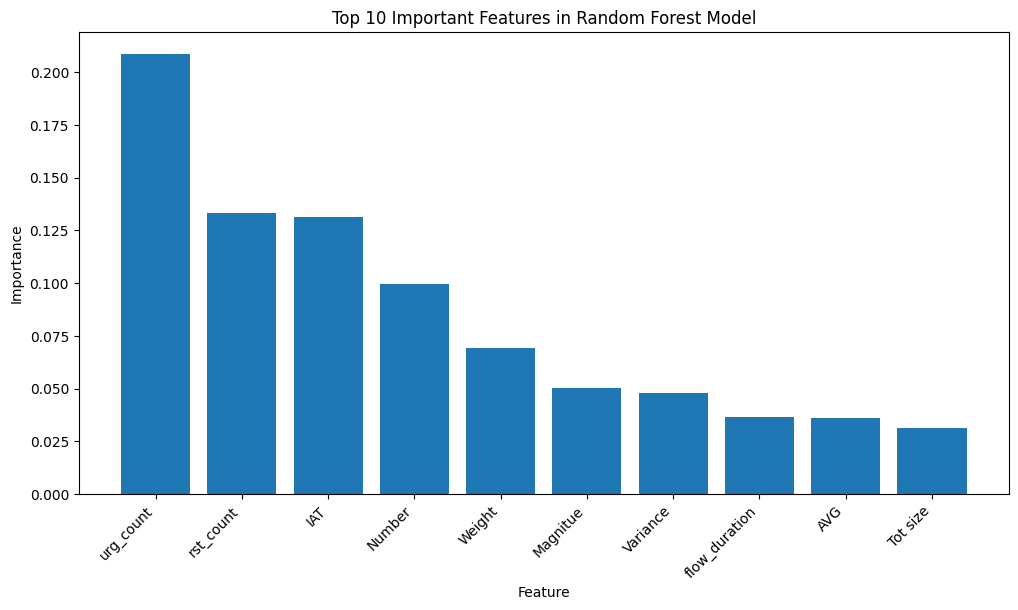

In [38]:

# Print the top features
print("Top 10 Important Features (Random Forest):")
print(feature_importance_df_rf.head(10))

# Plotting the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df_rf['Feature'][:10], feature_importance_df_rf['Importance'][:10])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Important Features in Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.show()